In [1]:
%reset -f 

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X.shape , train_y.shape

((60000, 28, 28), (60000,))

In [3]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X / 255.0
test_X = test_X / 255.0

# train_y = tf.keras.utils.to_categorical(train_y)
# test_y = tf.keras.utils.to_categorical(test_y)

## Dense Layer

In [4]:
model=None
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

2022-07-29 23:08:21.797693: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-29 23:08:21.870328: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-29 23:08:21.871779: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-29 23:08:21.874941: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

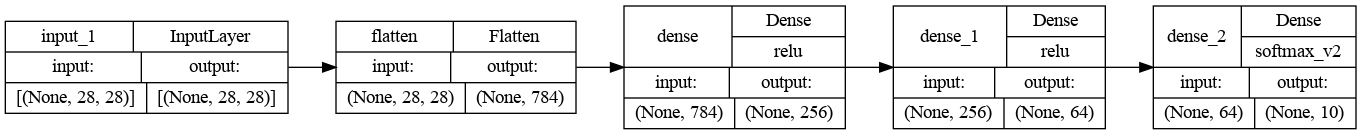

In [5]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    rankdir='LR', #TB/LR
    show_layer_activations=True
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [7]:
784*256+256, 256*64+64, 64*10+10

(200960, 16448, 650)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, 
                    train_y, 
                    epochs=5,
                    validation_data=(test_X, test_y),
                   )

Epoch 1/5
 169/1875 [=>............................] - ETA: 1s - loss: 0.6423 - accuracy: 0.8077

2022-07-29 23:08:38.710815: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.2164 - accuracy: 0.9357 - val_loss: 0.1100 - val_accuracy: 0.9663
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0896 - accuracy: 0.9728 - val_loss: 0.0877 - val_accuracy: 0.9727
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0607 - accuracy: 0.9812 - val_loss: 0.0773 - val_accuracy: 0.9777
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0444 - accuracy: 0.9863 - val_loss: 0.0844 - val_accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0354 - accuracy: 0.9885 - val_loss: 0.0760 - val_accuracy: 0.9779


In [9]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 0s 792us/step - loss: 0.0760 - accuracy: 0.9779


[0.07598213106393814, 0.9779000282287598]

In [10]:
classifications = model.predict(test_X)
print(classifications[0])
print(test_y[0])

313/313 [==============================] - 0s 567us/step
[2.4869731e-08 5.0176283e-08 4.7310249e-07 4.7627728e-07 1.0978866e-10
 3.2812707e-08 3.1265984e-13 9.9997199e-01 7.8267277e-09 2.6953743e-05]
7


In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


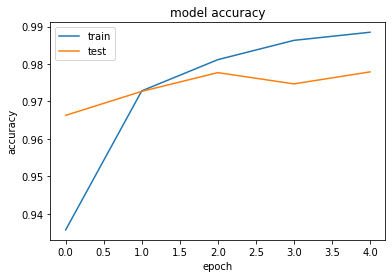

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

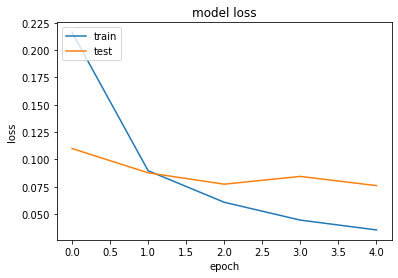

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## CNN

In [14]:
model=None
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

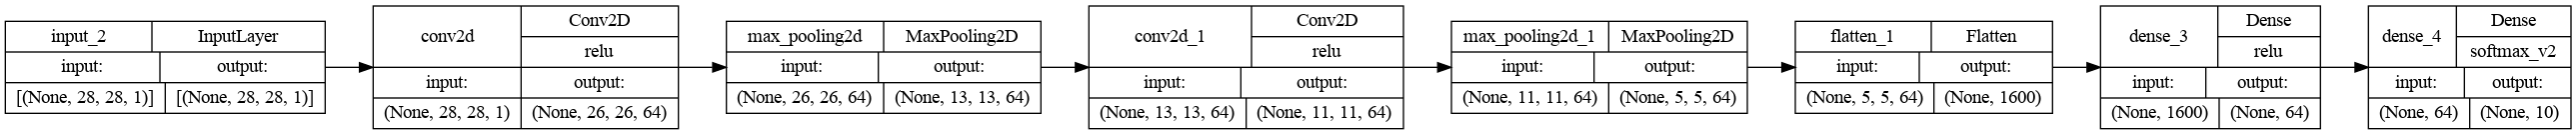

In [15]:
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True, 
                          rankdir='LR', #TB/LR
                          show_layer_activations=True
                         ) 

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [17]:
# Parameter calculation

# https://towardsdatascience.com/how-to-calculate-the-number-of-parameters-in-keras-models-710683dae0ca

(1*9+1)*64, (64*9+1)*64, 1600*64+64, 64*10+10

(640, 36928, 102464, 650)

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, 
                    train_y, 
                    epochs=5,
                    validation_data=(test_X, test_y),
                   )

Epoch 1/5


2022-07-29 23:09:36.122890: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2022-07-29 23:09:37.762622: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-07-29 23:09:37.763593: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2022-07-29 23:09:37.763603: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2022-07-29 23:09:37.763662: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be 

1875/1875 [==============================] - 7s 2ms/step - loss: 0.1348 - accuracy: 0.9587 - val_loss: 0.0804 - val_accuracy: 0.9730
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0448 - accuracy: 0.9858 - val_loss: 0.0407 - val_accuracy: 0.9864
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0354 - val_accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.0299 - val_accuracy: 0.9912
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0262 - val_accuracy: 0.9914


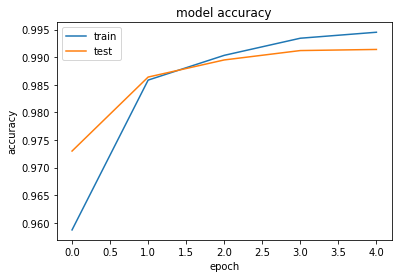

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

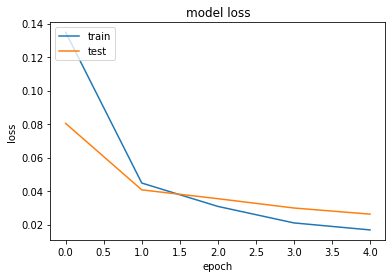

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Dropout

In [21]:
model=None
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

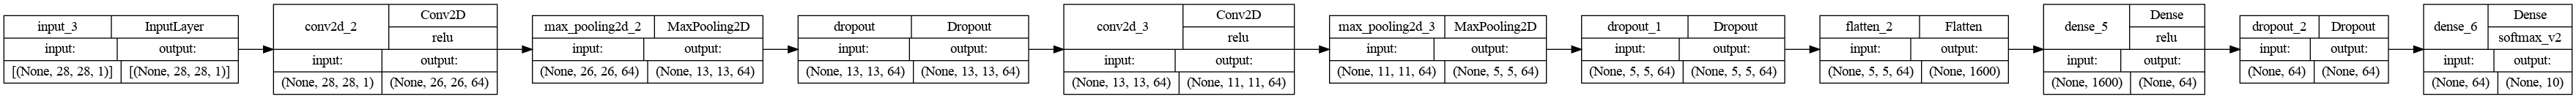

In [22]:
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True, 
                          rankdir='LR', #TB/LR
                          show_layer_activations=True
                         ) 

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, 
                    train_y, 
                    epochs=5,
                    validation_data=(test_X, test_y),
                   )

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1761 - accuracy: 0.9453 - val_loss: 0.0429 - val_accuracy: 0.9858
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0652 - accuracy: 0.9800 - val_loss: 0.0331 - val_accuracy: 0.9894
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.0346 - val_accuracy: 0.9886
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0427 - accuracy: 0.9866 - val_loss: 0.0329 - val_accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0362 - accuracy: 0.9883 - val_loss: 0.0285 - val_accuracy: 0.9910


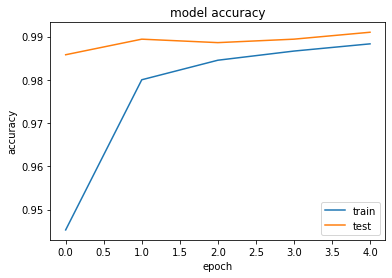

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

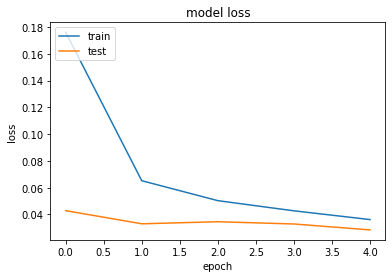

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

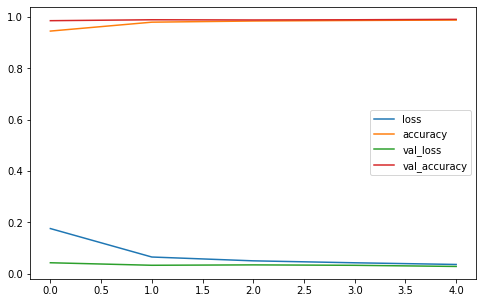

In [27]:
import pandas as pd 
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

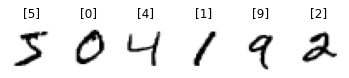

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,6)
for i in range(6):
    ax[i].imshow(train_X[i:i+1,:,:].reshape(28,28), cmap="binary")
    ax[i].axis("off")
    ax[i].set_title(str(train_y[i:i+1]))
    

## Callback

In [38]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                            patience=3,
                                            mode='max',
                                            restore_best_weights=True
                                           )

model=None
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

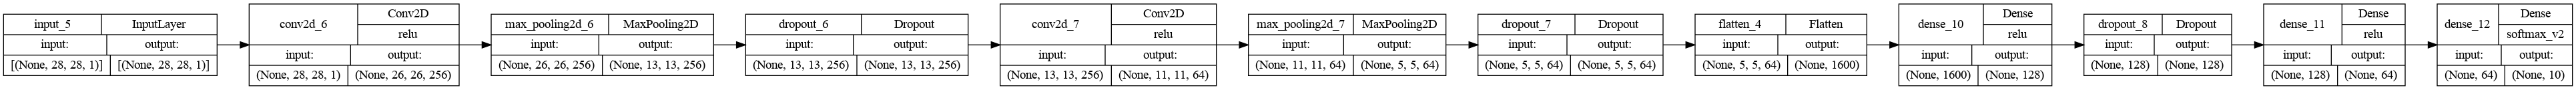

In [39]:
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True, 
                          rankdir='LR', #TB/LR
                          show_layer_activations=True
                         ) 

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 256)       2560      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 256)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        147520    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 64)         

In [41]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, 
                    train_y, 
                    epochs=30,
                    validation_data=(test_X, test_y),
                    callbacks=[callback]
                   )

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1595 - accuracy: 0.9491 - val_loss: 0.0571 - val_accuracy: 0.9801
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0604 - accuracy: 0.9822 - val_loss: 0.0324 - val_accuracy: 0.9886
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0476 - accuracy: 0.9856 - val_loss: 0.0326 - val_accuracy: 0.9905
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0296 - val_accuracy: 0.9901
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0342 - val_accuracy: 0.9887
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0295 - val_accuracy: 0.9911
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0302 - val_accuracy:

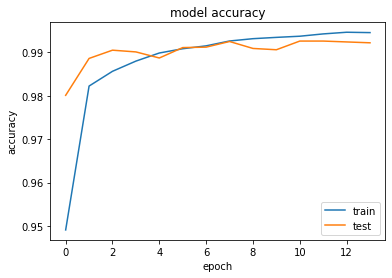

In [42]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

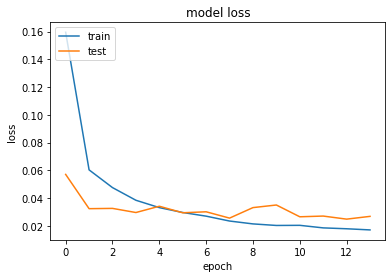

In [43]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Regularization

In [ ]:
# Data Augmentation
# Early Stopping
# DropOut

## Classic Network

In [ ]:
# LeNet-5 
# AlexNet
# VGG 

# ResNet
# Inception

## Importance of 1x1 convolution

## Uses of CNN

In [ ]:
# Image Classification
# Classification + Localization
# Object Detection